### 特征选择

特征选择的标准：信息增益(information gain)，即划分数据集之后信息发生的变化。计算每个特征值划分数据集获得的信息增益，获得信息增益最高的特征就是最好的选择。

香农熵(shannon)或者简称为熵(entropy)：信息的期望值。在信息论与概率统计中，熵是表示随机变量不确定性的度量。熵越大，随机变量的不确定性就越大。

假设$p(x_i)$是选择该分类的概率(从图中看出概率越小，熵越大)，则该类别$x_i$的信息定义为
$$l(x_i) = -\log_2 p(x_i)$$

假设待分类的事物划分在多个分类，即标签类别，且分类数目为$K$，则可计算所有类别所有可能值包含的信息期望值(数学期望)为
$$H = -\sum_{i=1}^n p(x_i) \log_2 p(x_i)$$

经验熵(empirical entropy)：熵中的概率由数据估计(特别是最大似然估计)得到时所对应的熵，浅显的解释就是，这概率是我们根据数据数出来的。
假设训练数据集的经验熵为$H(D)$，$|D|$表示其样本容量，设有$K$个类，$\{C_k\}_{k=1}^K$，$|C_k|$为属于类$C_k$的样本个数，则经验熵公式为
$$H(D) = -\sum_{k=1}^K \frac{|C_k|}{|D|} \log_2 \frac{|C_k|}{|D|}$$

总结；经验熵是针对于某个数据集的，不涉及到特征选择和划分数据集。

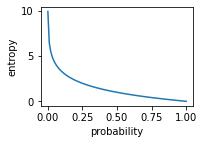

In [28]:
from matplotlib import pyplot as plt
import numpy as np
def l(p):
    return -np.log2(p)
p = np.linspace(1e-3, 1, 100, endpoint=True)
fig = plt.figure()  
ax = fig.add_subplot(221)  
ax.plot(p, l(p))
ax.set_xlabel('probability')
ax.set_ylabel('entropy')
plt.show()

In [29]:
from math import log
def createDataSet():
    dataSet = [[0, 0, 0, 0, 'no'],
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    labels = ['不放贷', '放贷']
    return dataSet, labels

def compute_empEntropy(dataSet):
    numrows = len(dataSet)
    labelCounts = {}
    for row in dataSet:
        curlabel = row[-1]
        if curlabel not in labelCounts:
            labelCounts[curlabel] = 0
        labelCounts[curlabel] += 1
    entropy = 0
    for key in labelCounts:
        prob = labelCounts[key] / numrows
        entropy -= prob * log(prob, 2)
    return entropy

if __name__ == '__main__':
    dataSet, labels = createDataSet()
    print (dataSet)
    print (compute_empEntropy(dataSet))

[[0, 0, 0, 0, 'no'], [0, 0, 0, 1, 'no'], [0, 1, 0, 1, 'yes'], [0, 1, 1, 0, 'yes'], [0, 0, 0, 0, 'no'], [1, 0, 0, 0, 'no'], [1, 0, 0, 1, 'no'], [1, 1, 1, 1, 'yes'], [1, 0, 1, 2, 'yes'], [1, 0, 1, 2, 'yes'], [2, 0, 1, 2, 'yes'], [2, 0, 1, 1, 'yes'], [2, 1, 0, 1, 'yes'], [2, 1, 0, 2, 'yes'], [2, 0, 0, 0, 'no']]
0.9709505944546686


条件熵(conditional entropy) $H(Y|X)$：随机变量X给定的条件下, $Y$的条件概率分布的熵对$X$的数学期望，
$$H(T|X) = \sum_{i=1}^n p_i H(Y|X=x_i), \quad p_i = P(X = x_i), \quad i = 1, \dots, n$$

条件经验熵(empirical conditional entropy)：条件熵中的概率由数据估计(特别是极大似然估计)得到时，所对应的条件熵

特征$A$对训练数据集$D$的信息增益：集合$D$的经验熵$H(D)$与特征$A$给定条件下$D$的经验条件熵$H(D|A)$之差，即互信息(mutual information)。决策树学习中的信息增益等价于训练数据集中类与特征的互信息。
$$g(D) = H(D) - H(D|A)$$

假设特征$A$有$n$个不同的取值$\{a_1, a_2, \dots, a_n\}$，根据特征$A$的取值将$D$划分为$n$个子集$\{D_1, D_2, \dots, D_n\}$，$|D_i|$为$D_i$的样本个数。记子集$D_i$中属于$C_k$的样本的集合为$D_{ik}$，即$D_{ik} = D_i \cap C_k$，$|D_{ik}|$为$D_{ik}$的样本个数。于是经验条件熵的公式可以些为
$$H(D|A) = \sum_{i=1}^n \frac{|D_i|}{|D|} H(D_i) = -\sum_{i=1}^n \frac{|D_i|}{|D|} \sum_{k=1}^K \frac{|D_{ik}|}{|D_i|} \log_2{\frac{|D_{ik}|}{|D_i|}}$$

总结：给定特征$A$，有$n$个取值，每个取值对应一个数据子集$D_i$，该子集的熵$H(D_i)$可通过子集$D_i$内的$K$个标签分类计算。所有子集的熵的期望即为训练数据集$D$在特征$A$下的条件熵。$D$的熵$H(D)$，减去$D$在$A$下的条件熵$H(D|A)$，即互信息，为特征$A$对训练数据集$D$的信息增益$g(D, A)$。

In [35]:
from math import log
def compute_empEntropy(dataSet):
    numrows = len(dataSet)
    labelCounts = {}
    for row in dataSet:
        curlabel = row[-1]
        if curlabel not in labelCounts:
            labelCounts[curlabel] = 0
        labelCounts[curlabel] += 1
    entropy = 0
    for key in labelCounts:
        prob = labelCounts[key] / numrows
        entropy -= prob * log(prob, 2)
    return entropy

def splitDataSet(dataSet, axis, value):
    """
    Params:
    axis: index of feature, ranging from 0 to 3 since there are 4 features in our dataSet
    values: values of the selected feature, e.g., 1st feature: 0->青年; 1->中年; 2->老年
    Returns:
    subDateSet of given value of axis, subtracting [axis] feature
    """
    returnDateSet = []
    for featureVec in dataSet:
        if featureVec[axis] == value:
            reducedFeatureVec = featureVec[:axis]
            reducedFeatureVec.extend(featureVec[axis+1:])
            returnDateSet.append(reducedFeatureVec)
    return returnDateSet

def pick_feature(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = compute_empEntropy(dataSet)
    bestInfoGain = 0.
    for i in range(numFeatures):
        featureList = [example[i] for example in dataSet]
        uniqueVals = set(featureList)
        newEntropy = 0.
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / len(dataSet)
            newEntropy += prob * compute_empEntropy(subDataSet)
        infoGain = baseEntropy - newEntropy
        print("第%d个特征的增益为%.3f" % (i, infoGain))
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

if __name__ == '__main__':
    dataSet, features = createDataSet()
    print("最优特征索引值:" + str(pick_feature(dataSet)))

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
最优特征索引值:2
